- Com a base de dados SQL em anexo, montar o banco de dados no GCP;
- Consumir essa base de dados no colab e tranformar em DATAFRAMES;
- Realizar tratamento dos dados caso necessário;
- Aplicar ao máximo o uso da Estatística para eventuais tomadas de decisões

In [ ]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 26.4 MB/s eta 0:00:00


**Base de dados Logistica**

In [ ]:
import mysql.connector
from mysql.connector import Error

#Definir as credenciais e informações da conexão
servidor = '35.193.47.202'
basededados = 'logistica'
usuario = 'Patrícia'
senha = ''

In [ ]:
def connect_to_database():
  try:
    connection = mysql.connector.connect(
        host = servidor,
        database = basededados,
        user = usuario,
        password = senha
    )
    if connection.is_connected():
      print("Conexão bem-sucedidade ao banco de dados MySQL!")
      return connection
  except Error as e:
    print("Erro ao conectar ao MySQL", e)
    return None

In [ ]:
#Chamar a função de conexão
connection = connect_to_database()

Conexão bem-sucedidade ao banco de dados MySQL!


In [ ]:
#Fechar a conexão
if connection:
  connection.close()

**Convertendo a tabela Motoristas para um dataframe**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    motoristas_df = pd.DataFrame(data, columns=columns)
    return motoristas_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM Motoristas;"
  motoristas_df = fecth_data_as_dataframe(connection, query)

  if motoristas_df is not None:
    print("Dados da Tabela Motoristas:")
    print(motoristas_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela Motoristas:
   ID_Motorista            Nome  Idade  Tempo_de_Empresa          Regiao  \
0             1   William White     30                16  New Tiffanyton   
1             2     Amber Stone     56                 8      Martinstad   
2             3    James Larson     45                 6     Lake Nicole   
3             4  Terri Hatfield     40                12     Douglastown   
4             5   Richard Moore     45                24   Michelleburgh   

   Avaliacao_Desempenho  
0               2.03980  
1               2.81296  
2               1.12926  
3               2.11905  
4               2.64483  


In [ ]:
motoristas_df.head()

,ID_Motorista,Nome,Idade,Tempo_de_Empresa,Regiao,Avaliacao_Desempenho
0,1,William White,30,16,New Tiffanyton,2.03980
1,2,Amber Stone,56,8,Martinstad,2.81296
2,3,James Larson,45,6,Lake Nicole,1.12926
3,4,Terri Hatfield,40,12,Douglastown,2.11905
4,5,Richard Moore,45,24,Michelleburgh,2.64483


In [ ]:
motoristas_df.shape

(20, 6)

**Verificar dados do dataframe para a tabela motoristas**
* Duplicatas;
*Valores nulos;
* Consistência dos dados;
* Tipo de dados em cada coluna;


In [ ]:
# Verificar se há coluna com valores nulos
motoristas_df.isnull().any()

,0
ID_Motorista,False
Nome,False
Idade,False
Tempo_de_Empresa,False
Regiao,False
Avaliacao_Desempenho,False


In [ ]:
# Verificar valores duplicados
motoristas_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [ ]:
motoristas_df.dtypes

,0
ID_Motorista,int64
Nome,object
Idade,int64
Tempo_de_Empresa,int64
Regiao,object
Avaliacao_Desempenho,float64


**Convertendo a tabela Pedidos para um dataframe**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    pedidos_df = pd.DataFrame(data, columns=columns)
    return pedidos_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM Pedidos;"
  pedidos_df = fecth_data_as_dataframe(connection, query)

  if motoristas_df is not None:
    print("Dados da Tabela Pedidos:")
    print(pedidos_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela Pedidos:
   ID_Pedido Data_Pedido Data_Entrega_Estimada Data_Entrega_Real  \
0          1  2023-01-01            2023-01-05        2023-01-06   
1          2  2023-01-02            2023-01-06        2023-01-07   
2          3  2023-01-03            2023-01-07        2023-01-08   
3          4  2023-01-04            2023-01-08        2023-01-09   
4          5  2023-01-05            2023-01-09        2023-01-10   

   Distancia_km  Custo_Transporte   Peso_kg       Regiao  Motorista  Veiculo  
0       380.795           128.286  322.8060     West Jon         13        9  
1       951.207           672.769   46.6493   Laurenside         20        8  
2       734.674           382.920   85.0062   Brookefurt         15        3  
3       602.672           557.714  449.7840  Justinshire          3        1  
4       164.458           916.810  305.1820  North Sarah          8        3  


In [ ]:
pedidos_df.head()


,ID_Pedido,Data_Pedido,Data_Entrega_Estimada,Data_Entrega_Real,Distancia_km,Custo_Transporte,Peso_kg,Regiao,Motorista,Veiculo
0,1,2023-01-01,2023-01-05,2023-01-06,380.795,128.286,322.8060,West Jon,13,9
1,2,2023-01-02,2023-01-06,2023-01-07,951.207,672.769,46.6493,Laurenside,20,8
2,3,2023-01-03,2023-01-07,2023-01-08,734.674,382.920,85.0062,Brookefurt,15,3
3,4,2023-01-04,2023-01-08,2023-01-09,602.672,557.714,449.7840,Justinshire,3,1
4,5,2023-01-05,2023-01-09,2023-01-10,164.458,916.810,305.1820,North Sarah,8,3


In [ ]:
pedidos_df.shape

(100, 10)

In [ ]:
# Verificar se há coluna com valores nulos
pedidos_df.isnull().any()

,0
ID_Pedido,False
Data_Pedido,False
Data_Entrega_Estimada,False
Data_Entrega_Real,False
Distancia_km,False
Custo_Transporte,False
Peso_kg,False
Regiao,False
Motorista,False
Veiculo,False


In [ ]:
# Verificar valores duplicados
pedidos_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


In [ ]:
pedidos_df.dtypes

,0
ID_Pedido,int64
Data_Pedido,datetime64[ns]
Data_Entrega_Estimada,datetime64[ns]
Data_Entrega_Real,datetime64[ns]
Distancia_km,float64
Custo_Transporte,float64
Peso_kg,float64
Regiao,object
Motorista,int64
Veiculo,int64


**Convertendo a tabela Veículos para um dataframe**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    veiculos_df = pd.DataFrame(data, columns=columns)
    return veiculos_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM Veiculos;"
  veiculos_df = fecth_data_as_dataframe(connection, query)

  if motoristas_df is not None:
    print("Dados da Tabela Veiculos:")
    print(veiculos_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela Veiculos:
   ID_Veiculo      Tipo  Capacidade_kg  Custo_Manutencao_Mensal  \
0           1  Caminhão        986.757                  839.116   
1           2       Van        439.065                 3612.710   
2           3      Moto        774.620                 2904.560   
3           4  Caminhão        453.690                 3874.600   
4           5       Van        846.248                 4609.250   

   Consumo_Combustivel_km_l  
0                   8.07568  
1                   8.77164  
2                   9.12098  
3                   8.10841  
4                  18.17330  


In [ ]:
veiculos_df.head()

,ID_Veiculo,Tipo,Capacidade_kg,Custo_Manutencao_Mensal,Consumo_Combustivel_km_l
0,1,Caminhão,986.757,839.116,8.07568
1,2,Van,439.065,3612.710,8.77164
2,3,Moto,774.620,2904.560,9.12098
3,4,Caminhão,453.690,3874.600,8.10841
4,5,Van,846.248,4609.250,18.17330


In [ ]:
veiculos_df.shape

(10, 5)

In [ ]:
# Verificar se há coluna com valores nulos
veiculos_df.isnull().any()

,0
ID_Veiculo,False
Tipo,False
Capacidade_kg,False
Custo_Manutencao_Mensal,False
Consumo_Combustivel_km_l,False


In [ ]:
# Verificar valores duplicados
veiculos_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [ ]:
veiculos_df.dtypes

,0
ID_Veiculo,int64
Tipo,object
Capacidade_kg,float64
Custo_Manutencao_Mensal,float64
Consumo_Combustivel_km_l,float64


**Estatística**

In [ ]:
# Média de custo de transporte dos pedidos
media_custo_transporte = round(pedidos_df['Custo_Transporte'].mean(), 2)
print(f"A média de custo de transporte dos pedidos é R${media_custo_transporte}.")

A média de custo de transporte dos pedidos é R$548.05.


In [ ]:
# Média de consumo de combustível
media_consumo_combustivel = round(veiculos_df['Consumo_Combustivel_km_l'].mean(), 2)
print(f"A média de consumo de combustível dos véiculos por km para entrega dos pedidos é R${media_consumo_combustivel}.")

A média de consumo de combustível dos véiculos por km para entrega dos pedidos é R$10.11.


In [ ]:
# Média de custo de manuntenção mensal dos veículos
media_manutencao = round(veiculos_df['Custo_Manutencao_Mensal'].mean(), 2)
print(f"A média de custo mensal para manutenção dos veículos para entrega dos pedidos é R${media_manutencao}.")

A média de custo mensal para manutenção dos veículos para entrega dos pedidos é R$3043.3.


In [ ]:
# Correlação entre o custo de transporte e a distância
correlacao = pedidos_df[['Distancia_km', 'Custo_Transporte']].corr()
print(correlacao) # Correlação neagtiva próxima a 0, indica que a medida que a distância aumenta o preço do transporte tende a diminuir levemente

                  Distancia_km  Custo_Transporte
Distancia_km          1.000000         -0.034033
Custo_Transporte     -0.034033          1.000000


In [ ]:
# Correlação entre o custo de manutenção e o consumo de combustível
correlacao = veiculos_df[['Custo_Manutencao_Mensal', 'Consumo_Combustivel_km_l']].corr()
print(correlacao) # Correlação positiva próxima a 0, indica que o aumento do consumo de commbustível implica em um pequeno aumento do custo de manutenção do veículo

                          Custo_Manutencao_Mensal  Consumo_Combustivel_km_l
Custo_Manutencao_Mensal                  1.000000                  0.261992
Consumo_Combustivel_km_l                 0.261992                  1.000000


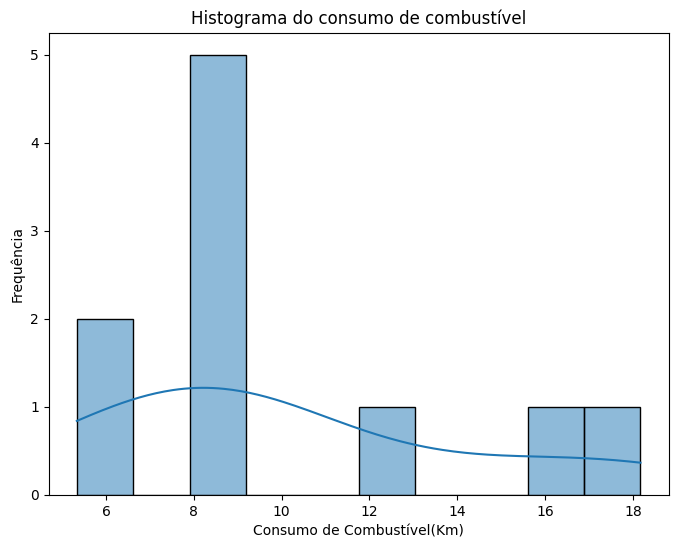

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma para avaliar o consumo de combustível
plt.figure(figsize=(8, 6))
sns.histplot(veiculos_df['Consumo_Combustivel_km_l'], bins=10, kde=True)
plt.title('Histograma do consumo de combustível')
plt.xlabel('Consumo de Combustível(Km)')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Cálculo de covariância entre custo de transporte e peso do pedido
covariancia = pedidos_df[['Peso_kg', 'Custo_Transporte']].cov()
print("Covariância entre Peso e Custo de Transporte:")
print(covariancia) #aumento do peso implica na redução do custo de transporte

Covariância entre Peso e Custo de Transporte:
                       Peso_kg  Custo_Transporte
Peso_kg           21096.414972      -5607.677911
Custo_Transporte  -5607.677911      69590.503421


In [ ]:
# Correlação entre o custo de transporte e o peso do pedido
correlacao = pedidos_df[['Peso_kg', 'Custo_Transporte']].corr()
print(correlacao) # correlação negativa próxima a ), indica que o aumento do peso resulta em leve redução do custo de transporte

                   Peso_kg  Custo_Transporte
Peso_kg           1.000000         -0.146354
Custo_Transporte -0.146354          1.000000


In [ ]:
# Desvio padrão e variância Custo de Transporte e Manutenção
# Variância Custo de Transporte
variancia_transporte = round(pedidos_df['Custo_Transporte'].var(), 2)
print(f"A variância do custo de transporte dos pedidos é {variancia_transporte}")

# Desvio padrão
desvio_padrao_transporte = round(pedidos_df['Custo_Transporte'].std(), 2)
print(f"O desvio padrão do custo de transporte dos pedidos é {desvio_padrao_transporte}")

# Variância Custo de Manutenção dos veículos
variancia_manutencao = round(veiculos_df['Consumo_Combustivel_km_l'].var(), 2)
print(f"A variância do custo de manutenção dos veículos é {variancia_manutencao}")

# Desvio padrão
desvio_padrao_manutencao = round(veiculos_df['Consumo_Combustivel_km_l'].std(), 2)
print(f"O desvio padrão do custo de manutenção dos veículos é {desvio_padrao_manutencao}")


A variância do custo de transporte dos pedidos é 69590.5
O desvio padrão do custo de transporte dos pedidos é 263.8
A variância do custo de manutenção dos veículos é 18.21
O desvio padrão do custo de manutenção dos veículos é 4.27


**Base de dados locadora**

In [ ]:
import mysql.connector
from mysql.connector import Error

#Definir as credenciais e informações da conexão
servidor = '35.193.47.202'
basededados = 'locadora'
usuario = 'Patrícia'
senha = ''


In [ ]:
def connect_to_database():
  try:
    connection = mysql.connector.connect(
        host = servidor,
        database = basededados,
        user = usuario,
        password = senha
    )
    if connection.is_connected():
      print("Conexão bem-sucedidade ao banco de dados MySQL!")
      return connection
  except Error as e:
    print("Erro ao conectar ao MySQL", e)
    return None

In [ ]:
#Chamar a função de conexão
connection = connect_to_database()

Conexão bem-sucedidade ao banco de dados MySQL!


In [ ]:
#Fechar a conexão
if connection:
  connection.close()

**Tabela Aluguel**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    aluguel_df = pd.DataFrame(data, columns=columns)
    return aluguel_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM aluguel;"
  aluguel_df = fecth_data_as_dataframe(connection, query)

  if aluguel_df is not None:
    print("Dados da Tabela aluguel:")
    print(aluguel_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela aluguel:
   codaluguel  codcliente  codcarro data_aluguel
0           1           3         2   2023-04-01
1           2           2         1   2023-04-02
2           3           2         1   2023-04-03
3           4           2         3   2023-04-04
4           5           1         4   2023-04-05


**Verificar os dados**

In [ ]:
aluguel_df.shape #(10,4)
aluguel_df.isnull().any() # nenhum valor nulo
aluguel_df.duplicated() #nenhum valor duplicado
aluguel_df.dtypes

,0
codaluguel,int64
codcliente,int64
codcarro,int64
data_aluguel,object


**Tabela Carro**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    carro_df = pd.DataFrame(data, columns=columns)
    return carro_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM carro;"
  carro_df = fecth_data_as_dataframe(connection, query)

  if carro_df is not None:
    print("Dados da Tabela carro:")
    print(carro_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela carro:
   codcarro  codmarca modelo  valor
0         1         1     Ka  100.0
1         2         2   Argo  150.0
2         3         3   Onix  170.0
3         4         4   Polo  150.0
4         5         5   Kwid  120.0


In [ ]:
carro_df.shape #(5,4)
carro_df.isnull().any() #nenhum valor nulo
carro_df.duplicated() #nenhum valor duplicado
carro_df.dtypes

,0
codcarro,int64
codmarca,int64
modelo,object
valor,float64


**Tabela Cliente**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cliente_df = pd.DataFrame(data, columns=columns)
    return cliente_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM cliente;"
  cliente_df = fecth_data_as_dataframe(connection, query)

  if cliente_df is not None:
    print("Dados da Tabela cliente:")
    print(cliente_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela cliente:
   codcliente              nome           cidade sexo estado estadocivil
0           1         Ana Silva  Duque de Caxias    F     RJ           C
1           2     Bruna Pereira          Niterói    F     RJ           C
2           3  Túlio Nascimento  Duque de Caxias    M     RJ           S
3           4    Fernando Souza         Campinas    M     SP           S
4           5     Lúcia Andrade        São Paulo    F     SP           C


In [ ]:
cliente_df.shape #(5,6)
cliente_df.isnull().any() #nenhum valor nulo
cliente_df.duplicated() #nenhum valor duplicado
cliente_df.dtypes

,0
codcliente,int64
nome,object
cidade,object
sexo,object
estado,object
estadocivil,object


**Tabela marca**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    marca_df = pd.DataFrame(data, columns=columns)
    return marca_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM marca;"
  marca_df = fecth_data_as_dataframe(connection, query)

  if marca_df is not None:
    print("Dados da Tabela marca:")
    print(marca_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela marca:
   codmarca       marca
0         1        Ford
1         2        Fiat
2         3   Chevrolet
3         4  Volkswagen
4         5     Renault


In [ ]:
marca_df.shape #(5,2)
marca_df.isnull().any() #nenhum valor nulo
marca_df.duplicated() #nenhum valor duplicado
marca_df.dtypes

,0
codmarca,int64
marca,object


**Estatística**

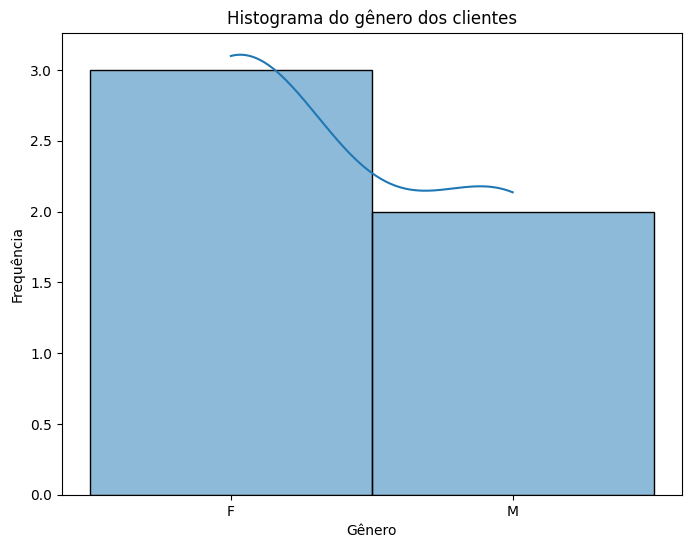

In [ ]:
# Histograma para avaliar a frequência de gênero dos clientes da locadora
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(cliente_df['sexo'], bins=5, kde=True)
plt.title('Histograma do gênero dos clientes')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()


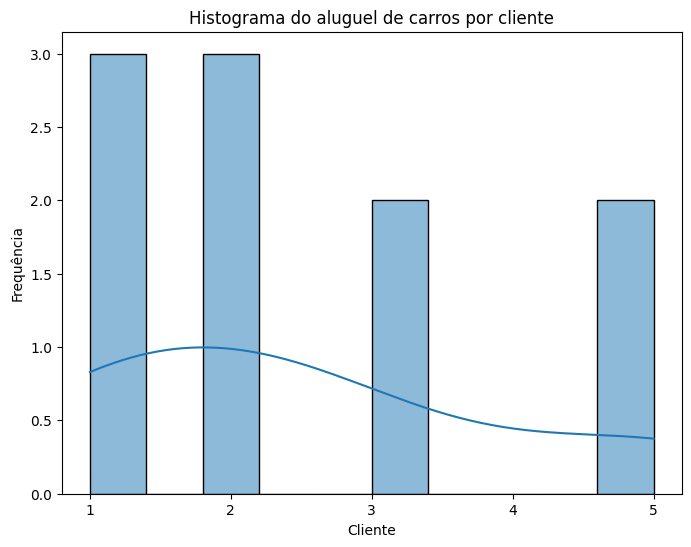

In [ ]:
# Histograma para frequência de aluguel de carros por cliente
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
sns.histplot(aluguel_df['codcliente'], bins=10, kde=True)
plt.title('Histograma do aluguel de carros por cliente')
plt.xlabel('Cliente')
plt.ylabel('Frequência')

x_ticks = np.arange(aluguel_df['codcliente'].min(), aluguel_df['codcliente'].max() + 1, 1) # altera a escla do gráfico
plt.xticks(x_ticks)
plt.show()

In [ ]:
# Média, moda, mediana, desvio padrão e variância de valor de aluguel dos carros da locadora
# Média
media_carro = carro_df['valor'].mean()

# Mediana
mediana_carro = carro_df['valor'].median()

# Moda
moda_carro = carro_df['valor'].mode()[0]

# Variância
variancia_carro = carro_df['valor'].var()

# Desvio padrão
desvio_padrao_carro = round(carro_df['valor'].std(), 2)

print(f"Média: R${media_carro}, Mediana: R${mediana_carro}, Moda: R${moda_carro}, Variância: {variancia_carro} e Desvio padrão: {desvio_padrao_carro}")

Média: R$138.0, Mediana: R$150.0, Moda: R$150.0, Variância: 770.0 e Desvio padrão: 27.75


**Base de dados loja**

In [ ]:
import mysql.connector
from mysql.connector import Error

#Definir as credenciais e informações da conexão
servidor = '35.193.47.202'
basededados = 'loja'
usuario = 'Patrícia'
senha = ''

In [ ]:
def connect_to_database():
  try:
    connection = mysql.connector.connect(
        host = servidor,
        database = basededados,
        user = usuario,
        password = senha
    )
    if connection.is_connected():
      print("Conexão bem-sucedidade ao banco de dados MySQL!")
      return connection
  except Error as e:
    print("Erro ao conectar ao MySQL", e)
    return None

In [ ]:
#Chamar a função de conexão
connection = connect_to_database()

Conexão bem-sucedidade ao banco de dados MySQL!


In [ ]:
#Fechar a conexão
if connection:
  connection.close()

**Tabela Categorias**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    categorias_df = pd.DataFrame(data, columns=columns)
    return categorias_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM categorias;"
  categorias_df = fecth_data_as_dataframe(connection, query)

  if categorias_df is not None:
    print("Dados da Tabela categorias:")
    print(categorias_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela categorias:
   id_categoria         nome
0             1  Eletrônicos
1             2       Roupas
2             3    Alimentos
3             4       Móveis
4             5   Cosméticos


In [ ]:
categorias_df.shape #(5,2)
categorias_df.isnull().any() #nenhum valor nulo
categorias_df.duplicated() #nenhum valor duplicado
categorias_df.dtypes

,0
id_categoria,int64
nome,object


**Tabela Clientes**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    clientes_df = pd.DataFrame(data, columns=columns)
    return clientes_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM clientes;"
  clientes_df = fecth_data_as_dataframe(connection, query)

  if clientes_df is not None:
    print("Dados da Tabela clientes:")
    print(clientes_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela clientes:
   id_cliente             nome         telefone          cidade  \
0           1       João Silva  (11) 98765-4321       São Paulo   
1           2     Maria Santos  (21) 98765-5432  Rio de Janeiro   
2           3  Carlos Oliveira  (31) 98765-6543  Belo Horizonte   
3           4        Ana Souza  (51) 98765-7654    Porto Alegre   
4           5     Pedro Santos  (41) 98765-8765        Curitiba   

              email     genero    endereco   renda data_nascimento  
0    joao@email.com  Masculino  Rua A, 123  5000.0      1980-05-10  
1   maria@email.com   Feminino  Av. B, 456  4000.0      1985-08-15  
2  carlos@email.com  Masculino  Rua C, 789  4500.0      1982-03-25  
3     ana@email.com   Feminino  Av. D, 987  3800.0      1990-12-08  
4   pedro@email.com  Masculino  Rua E, 654  6000.0      1975-09-14  


In [ ]:
clientes_df.shape #(40,9)
clientes_df.isnull().any() #nenhum valor nulo
clientes_df.duplicated() #nenhum valor duplicado
clientes_df.dtypes

,0
id_cliente,int64
nome,object
telefone,object
cidade,object
email,object
genero,object
endereco,object
renda,float64
data_nascimento,object


**Tabela fornecedores**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    fornecedores_df = pd.DataFrame(data, columns=columns)
    return fornecedores_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM fornecedores;"
  fornecedores_df = fecth_data_as_dataframe(connection, query)

  if fornecedores_df is not None:
    print("Dados da Tabela fornecedores:")
    print(fornecedores_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela fornecedores:
   id_fornecedor          nome          cidade    endereco  cnpj
0              1  Fornecedor A       São Paulo  Rua G, 234  1234
1              2  Fornecedor B  Rio de Janeiro  Av. H, 567  9876
2              3  Fornecedor C  Belo Horizonte  Rua I, 890  5678


In [ ]:
fornecedores_df.shape #(3,5)
fornecedores_df.isnull().any() #nenhum valor nulo
fornecedores_df.duplicated() #nenhum valor duplicado
fornecedores_df.dtypes

,0
id_fornecedor,int64
nome,object
cidade,object
endereco,object
cnpj,int64


**Tabela funcionários**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    funcionarios_df = pd.DataFrame(data, columns=columns)
    return funcionarios_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM funcionarios;"
  funcionarios_df = fecth_data_as_dataframe(connection, query)

  if funcionarios_df is not None:
    print("Dados da Tabela funcionarios:")
    print(funcionarios_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela funcionarios:
   id_funcionario             nome data_nascimento     genero estado_civil  \
0               1   Fernando Silva      1982-07-15  Masculino       Casado   
1               2      Aline Costa      1980-12-20   Feminino     Solteira   
2               3  Marcos Oliveira      1975-03-10  Masculino   Divorciado   
3               4   Patrícia Souza      1988-06-05   Feminino     Solteira   
4               5   Rafael Martins      1983-09-18  Masculino       Casado   

   dependentes      cargo  salario  
0            2   Vendedor   3500.0  
1            0    Gerente   6000.0  
2            1      Caixa   2800.0  
3            0  Vendedora   3200.0  
4            3    Gerente   6500.0  


In [ ]:
funcionarios_df.shape #(5,2)
funcionarios_df.isnull().any() #nenhum valor nulo
funcionarios_df.duplicated() #nenhum valor duplicado
funcionarios_df.dtypes

,0
id_funcionario,int64
nome,object
data_nascimento,object
genero,object
estado_civil,object
dependentes,int64
cargo,object
salario,float64


**Tabela produtos**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    produtos_df = pd.DataFrame(data, columns=columns)
    return produtos_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM produtos;"
  produtos_df = fecth_data_as_dataframe(connection, query)

  if produtos_df is not None:
    print("Dados da Tabela produtos:")
    print(produtos_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela produtos:
   id_produto            nome   preco  id_categoria  id_fornecedor
0           1    Smartphone X  1500.0             1              1
1           2      Notebook Y  3000.0             1              2
2           3      Camiseta Z    50.0             2              3
3           4  Arroz Integral    10.0             3              3
4           5    Sofá Confort  2500.0             4              1


In [ ]:
produtos_df.shape #(20,5)
produtos_df.isnull().any() #nenhum valor nulo
produtos_df.duplicated() #nenhum valor duplicado
produtos_df.dtypes

,0
id_produto,int64
nome,object
preco,float64
id_categoria,int64
id_fornecedor,int64


**Tabela vendas**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    vendas_df = pd.DataFrame(data, columns=columns)
    return vendas_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM vendas;"
  vendas_df = fecth_data_as_dataframe(connection, query)

  if vendas_df is not None:
    print("Dados da Tabela vendas:")
    print(vendas_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela vendas:
   id_venda  id_produto  quantidade  id_cliente  id_funcionario        data
0         1           1           2           1               1  2024-07-01
1         2           3           1           2               2  2024-07-02
2         3           5           1           3               1  2024-07-03
3         4           2           1           4               3  2024-07-04
4         5           4           3           5               2  2024-07-05


In [ ]:
vendas_df.shape #(123,6)
vendas_df.isnull().any() #nenhum valor nulo
vendas_df.duplicated() #nenhum valor duplicado
vendas_df.dtypes

,0
id_venda,int64
id_produto,int64
quantidade,int64
id_cliente,int64
id_funcionario,int64
data,object


**Estatística**

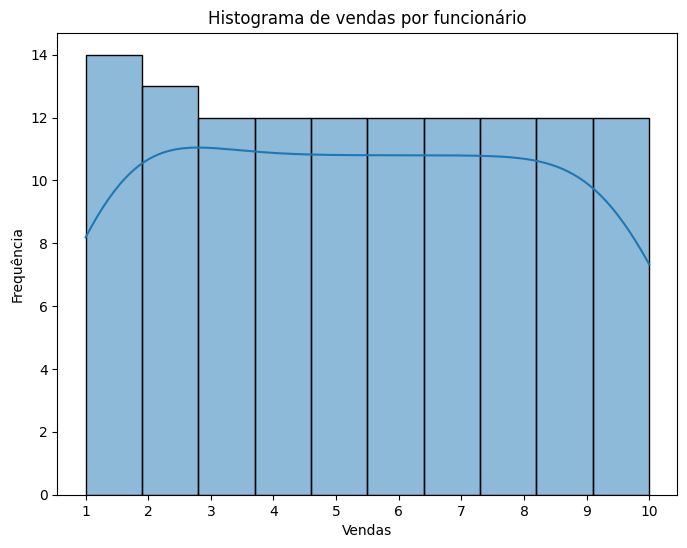

In [ ]:
# Histograma de vendas por funcionário
plt.figure(figsize=(8, 6))
sns.histplot(vendas_df['id_funcionario'], bins=10, kde=True)
plt.title('Histograma de vendas por funcionário')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
x_ticks = np.arange(vendas_df['id_funcionario'].min(), vendas_df['id_funcionario'].max() + 1, 1) # altera a escala do gráfico
plt.xticks(x_ticks)
plt.show()

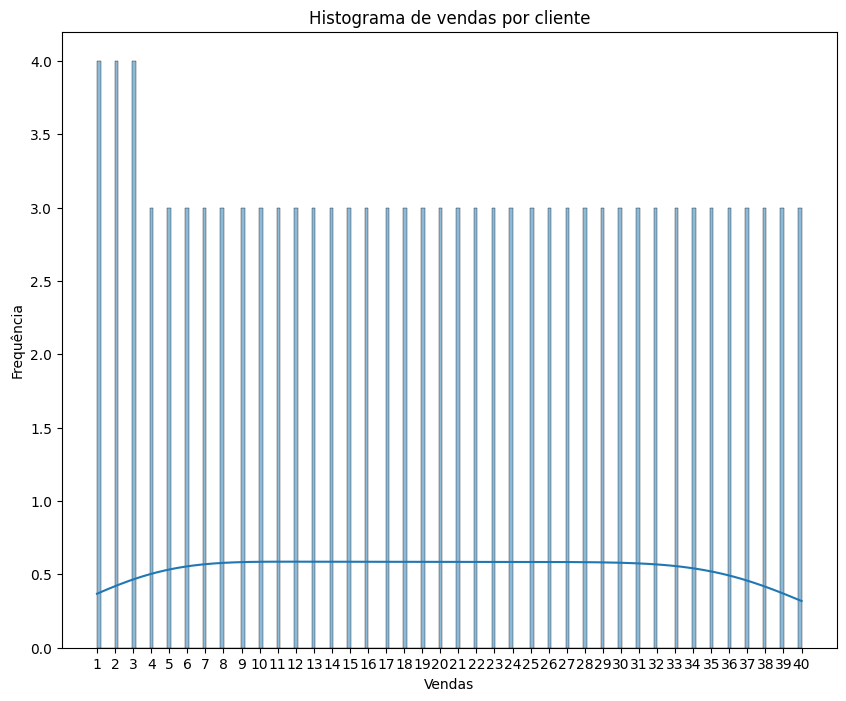

In [ ]:
# Histograma de vendas por cliente
plt.figure(figsize=(10, 8))
sns.histplot(vendas_df['id_cliente'], bins=200, kde=True)
plt.title('Histograma de vendas por cliente')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
x_ticks = np.arange(vendas_df['id_cliente'].min(), vendas_df['id_cliente'].max() + 1, 1) # altera a escala do gráfico
plt.xticks(x_ticks)
plt.show()

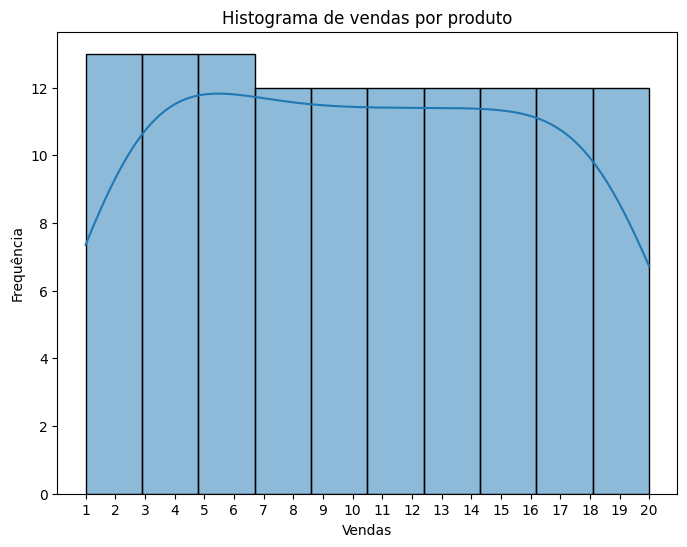

In [ ]:
# Histograma de vendas por produtos
plt.figure(figsize=(8, 6))
sns.histplot(vendas_df['id_produto'], bins=10, kde=True)
plt.title('Histograma de vendas por produto')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
x_ticks = np.arange(vendas_df['id_produto'].min(), vendas_df['id_produto'].max() + 1, 1) # altera a escla do gráfico
plt.xticks(x_ticks)
plt.show()

In [ ]:
# Média de preço dos produtos por categoria - usando groupby e mean
df_combinado = pd.merge(produtos_df, categorias_df, on='id_categoria')
df_combinado.head()

media_preco_categoria = (df_combinado.groupby(['id_categoria', 'nome_x'])['preco'].mean()).reset_index()
media_preco_categoria_ord = media_preco_categoria.sort_values(by=['id_categoria'], ascending=True)
print(media_preco_categoria_ord)

    id_categoria                        nome_x   preco
0              1      Fone de Ouvido Bluetooth   100.0
1              1               Monitor LED 24"   800.0
2              1                 Mouse Sem Fio    50.0
3              1                    Notebook Y  3000.0
4              1                  Smartphone X  1500.0
5              2                 Blusa de Frio    80.0
6              2                   Calça Jeans   120.0
7              2                    Camiseta Z    50.0
8              2                Vestido Floral   150.0
12             3                Feijão Carioca     8.0
11             3                Cereal Matinal    12.0
9              3                Arroz Integral    10.0
10             3  Azeite de Oliva Extra Virgem    15.0
13             4         Guarda-Roupa 6 Portas  1800.0
14             4                Mesa de Jantar  1500.0
15             4                     Sapateira   200.0
16             4                  Sofá Confort  2500.0
18        

In [ ]:
# Variância e desvio padrão do preço dos produtos
# Variância
variancia_produto = round(produtos_df['preco'].var(), 2)

# Desvio padrão
desvio_padrao_produto = round(produtos_df['preco'].std(), 2)

print(f"Variância: {variancia_produto}, Desvio Padrão: {desvio_padrao_produto}")

Variância: 869065.16, Desvio Padrão: 932.24


In [ ]:
# Média de salário dos funcionários por gênero
media_salario_genero = funcionarios_df.groupby('genero')['salario'].mean().rename('Media_salarial').reset_index()
print(media_salario_genero)


      genero  Media_salarial
0   Feminino          4240.0
1  Masculino          3800.0


In [ ]:
# Variância e desvio padrão do salário dos funcionários
# Variância
variancia_salario_func = round(funcionarios_df['salario'].var(), 2)

# Desvio padrão
desvio_padrao_salario_func = round(funcionarios_df['salario'].std(), 2)

print(f"Variância: {variancia_salario_func}, Desvio Padrão: {desvio_padrao_salario_func}")

Variância: 2264000.0, Desvio Padrão: 1504.66


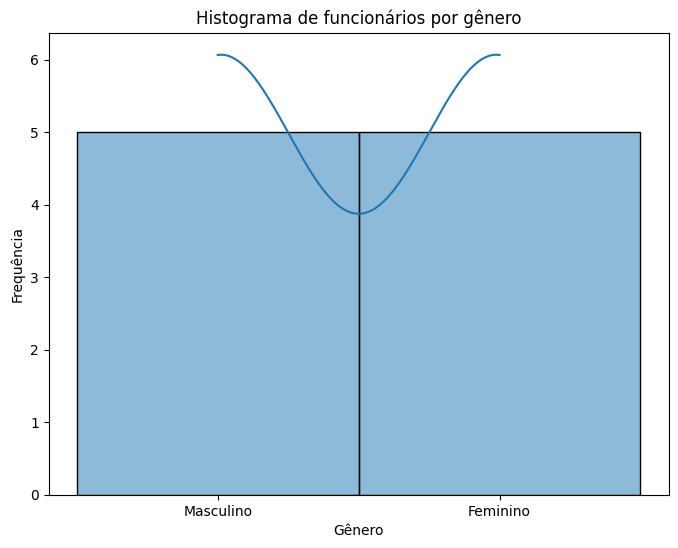

In [ ]:
# Histograma de frequência de funcionários por gênero
plt.figure(figsize=(8, 6))
sns.histplot(funcionarios_df['genero'], bins=10, kde=True)
plt.title('Histograma de funcionários por gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Correlação de salário com o número de dependentes do funcionários
correlacao_salario_dep = funcionarios_df[['salario', 'dependentes']].corr()
print(correlacao_salario_dep) # Correlação positiva, porém próxima de 0, indicando que o número de dependentes não tem forte influencia no salário dos funcionários

             salario  dependentes
salario      1.00000      0.17983
dependentes  0.17983      1.00000


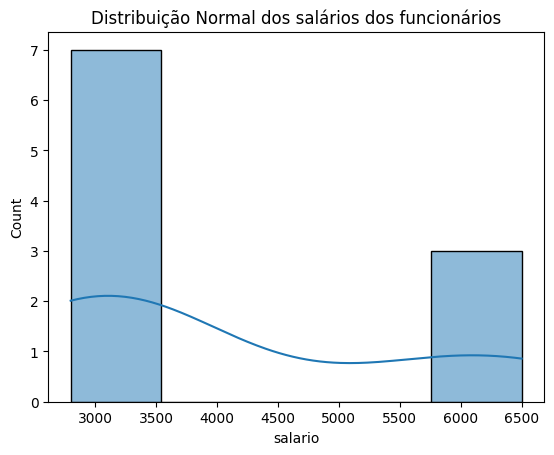

In [ ]:
# Distribuição normal dos salários
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(funcionarios_df['salario'], kde=True)
plt.title('Distribuição Normal dos salários dos funcionários')
plt.show()

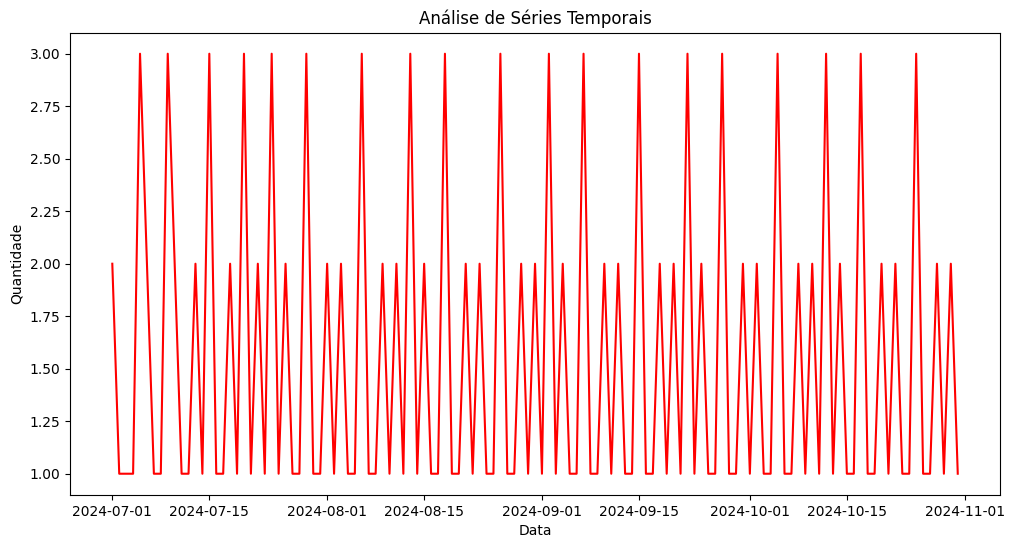

In [ ]:
#Série temporal para avaliar a quantidade de vendas ao longo do tempo
quantidade_vendas_tempo = vendas_df.groupby('data')['quantidade'].sum().reset_index()
#quantidade_vendas_tempo.head()
quantidade_vendas_tempo.set_index('data', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(quantidade_vendas_tempo.index, quantidade_vendas_tempo['quantidade'], color='red')
plt.title('Análise de Séries Temporais')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
# Teste t para avaliar se a média do preço dos produtos vendidos é superior a R$ 500
import pandas as pd
import numpy as np
from scipy import stats

valor_hipotetico = 500  # Valor hipotético para a média das vendas
t_stat, p_valor = stats.ttest_1samp(produtos_df['preco'], valor_hipotetico)

# Resultados do teste
print(f"Estatística t: {t_stat}, p-valor: {p_valor}")

# Interpretação do p-valor
if p_valor < 0.05:
    print("Rejeitamos a hipótese nula (H0), a média do preço dos produtos é significativamente diferente de R$ 500.")
else:
    print("Não podemos rejeitar a hipótese nula (H0), a média do preço dos produtos não é significativamente diferente de R$ 500.")

Estatística t: 0.48451831948182295, p-valor: 0.6335565096045781
Não podemos rejeitar a hipótese nula (H0), a média do preço dos produtos não é significativamente diferente de R$ 500.


**Base de dados Marketing_digital**

In [ ]:
import mysql.connector
from mysql.connector import Error

#Definir as credenciais e informações da conexão
servidor = '35.193.47.202'
basededados = 'marketing_digital'
usuario = 'Patrícia'
senha = ''

In [ ]:
def connect_to_database():
  try:
    connection = mysql.connector.connect(
        host = servidor,
        database = basededados,
        user = usuario,
        password = senha
    )
    if connection.is_connected():
      print("Conexão bem-sucedidade ao banco de dados MySQL!")
      return connection
  except Error as e:
    print("Erro ao conectar ao MySQL", e)
    return None

In [ ]:
#Chamar a função de conexão
connection = connect_to_database()

Conexão bem-sucedidade ao banco de dados MySQL!


In [ ]:
#Fechar a conexão
if connection:
  connection.close()

**Tabela Campanhas**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    campanhas_df = pd.DataFrame(data, columns=columns)
    return campanhas_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM Campanhas;"
  campanhas_df = fecth_data_as_dataframe(connection, query)

  if campanhas_df is not None:
    print("Dados da Tabela campanhas:")
    print(campanhas_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela campanhas:
   ID_Campanha Plataforma Data_Inicio   Data_Fim  Investimento_Total  \
0            1     Google  2023-01-01 2023-01-07             3014.64   
1            2     Google  2023-01-02 2023-01-08             8396.12   
2            3  Instagram  2023-01-03 2023-01-09             4105.74   
3            4  Instagram  2023-01-04 2023-01-10             4128.57   
4            5     Google  2023-01-05 2023-01-11             1286.24   

   Impressoes  Cliques  Conversoes           Regiao_Alvo Segmento_Alvo  
0       33254     1050         485            Tylershire         Saúde  
1       48362     2436          72              Mayhaven      Educação  
2       21128     5473         710      Lake Christopher         Saúde  
3       60383     2343         369  Port Jenniferborough    Tecnologia  
4       66545     2745         570             Molinaton         Saúde  


In [ ]:
campanhas_df.shape #(100,10)
campanhas_df.isnull().any() #nenhum valor nulo
campanhas_df.duplicated() #nenhum valor duplicado
campanhas_df.dtypes

,0
ID_Campanha,int64
Plataforma,object
Data_Inicio,datetime64[ns]
Data_Fim,datetime64[ns]
Investimento_Total,float64
Impressoes,int64
Cliques,int64
Conversoes,int64
Regiao_Alvo,object
Segmento_Alvo,object


**Tabela Plataforma**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    plataformas_df = pd.DataFrame(data, columns=columns)
    return plataformas_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM Plataformas;"
  plataformas_df = fecth_data_as_dataframe(connection, query)

  if plataformas_df is not None:
    print("Dados da Tabela plataformas:")
    print(plataformas_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela plataformas:
   ID_Plataforma       Nome  Custo_por_Clique  Custo_por_Impressao  \
0              1   Facebook          0.662722             0.017888   
1              2     Google          1.864080             0.094326   
2              3  Instagram          1.684010             0.059842   
3              4   LinkedIn          2.120610             0.037497   

   Conversoes_Totais  
0               5399  
1               7674  
2               1789  
3               3367  


In [ ]:
plataformas_df.shape #(4,5)
plataformas_df.isnull().any() #nenhum valor nulo
plataformas_df.duplicated() #nenhum valor duplicado
plataformas_df.dtypes

,0
ID_Plataforma,int64
Nome,object
Custo_por_Clique,float64
Custo_por_Impressao,float64
Conversoes_Totais,int64


**Tabela Usuários**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    usuarios_df = pd.DataFrame(data, columns=columns)
    return usuarios_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM Usuarios;"
  usuarios_df = fecth_data_as_dataframe(connection, query)

  if usuarios_df is not None:
    print("Dados da Tabela usuarios:")
    print(usuarios_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela usuarios:
   ID_Usuario  Idade     Genero  Localizacao  Interesses  \
0           1     23   Feminino  Palmershire      Viagem   
1           2     44  Masculino   Romerotown  Tecnologia   
2           3     57   Feminino   Port Logan    Educação   
3           4     51  Masculino   Robertland  Tecnologia   
4           5     29      Outro  Johnsonstad      Viagem   

   Historico_de_Compras  Tempo_de_Engajamento  
0                    60              15.41810  
1                    14              18.91760  
2                    75              26.19820  
3                    82              17.54770  
4                    12               1.88122  


In [ ]:
usuarios_df.shape #(200,7)
usuarios_df.isnull().any() #nenhum valor nulo
usuarios_df.duplicated() #nenhum valor duplicado
usuarios_df.dtypes

,0
ID_Usuario,int64
Idade,int64
Genero,object
Localizacao,object
Interesses,object
Historico_de_Compras,int64
Tempo_de_Engajamento,float64


**Estatística**

In [ ]:
# Média de idade dos usuários
media_idade_usuarios = usuarios_df['Idade'].mean()
print(f"A média de idade dos usuários é de {media_idade_usuarios} anos.")

A média de idade dos usuários é de 42.81 anos.


In [ ]:
# Variância e desvio padrão das impressões dos usuarios nas campanhas
# Variância
variancia_impressoes = round(campanhas_df['Impressoes'].var(), 2)

# Desvio padrão
desvio_padrao_impressoes= round(campanhas_df['Impressoes'].std(), 2)

print(f"Variância: {variancia_impressoes}, Desvio Padrão: {desvio_padrao_impressoes}")


Variância: 1011629526.68, Desvio Padrão: 31806.12


In [ ]:
# Média de tempo de engajamento por idade e gênero dos usuários
media_engajamento_idade = usuarios_df.groupby(['Idade', 'Genero'])['Tempo_de_Engajamento'].mean()
display(media_engajamento_idade)

Idade  Genero   
18     Feminino     21.392250
       Masculino    17.710945
19     Outro        25.293233
20     Masculino    15.004340
       Outro        16.854200
                      ...    
62     Outro        19.910900
63     Feminino     13.941060
       Masculino    22.415700
64     Feminino     15.910350
       Masculino    13.283933
Name: Tempo_de_Engajamento, Length: 105, dtype: float64

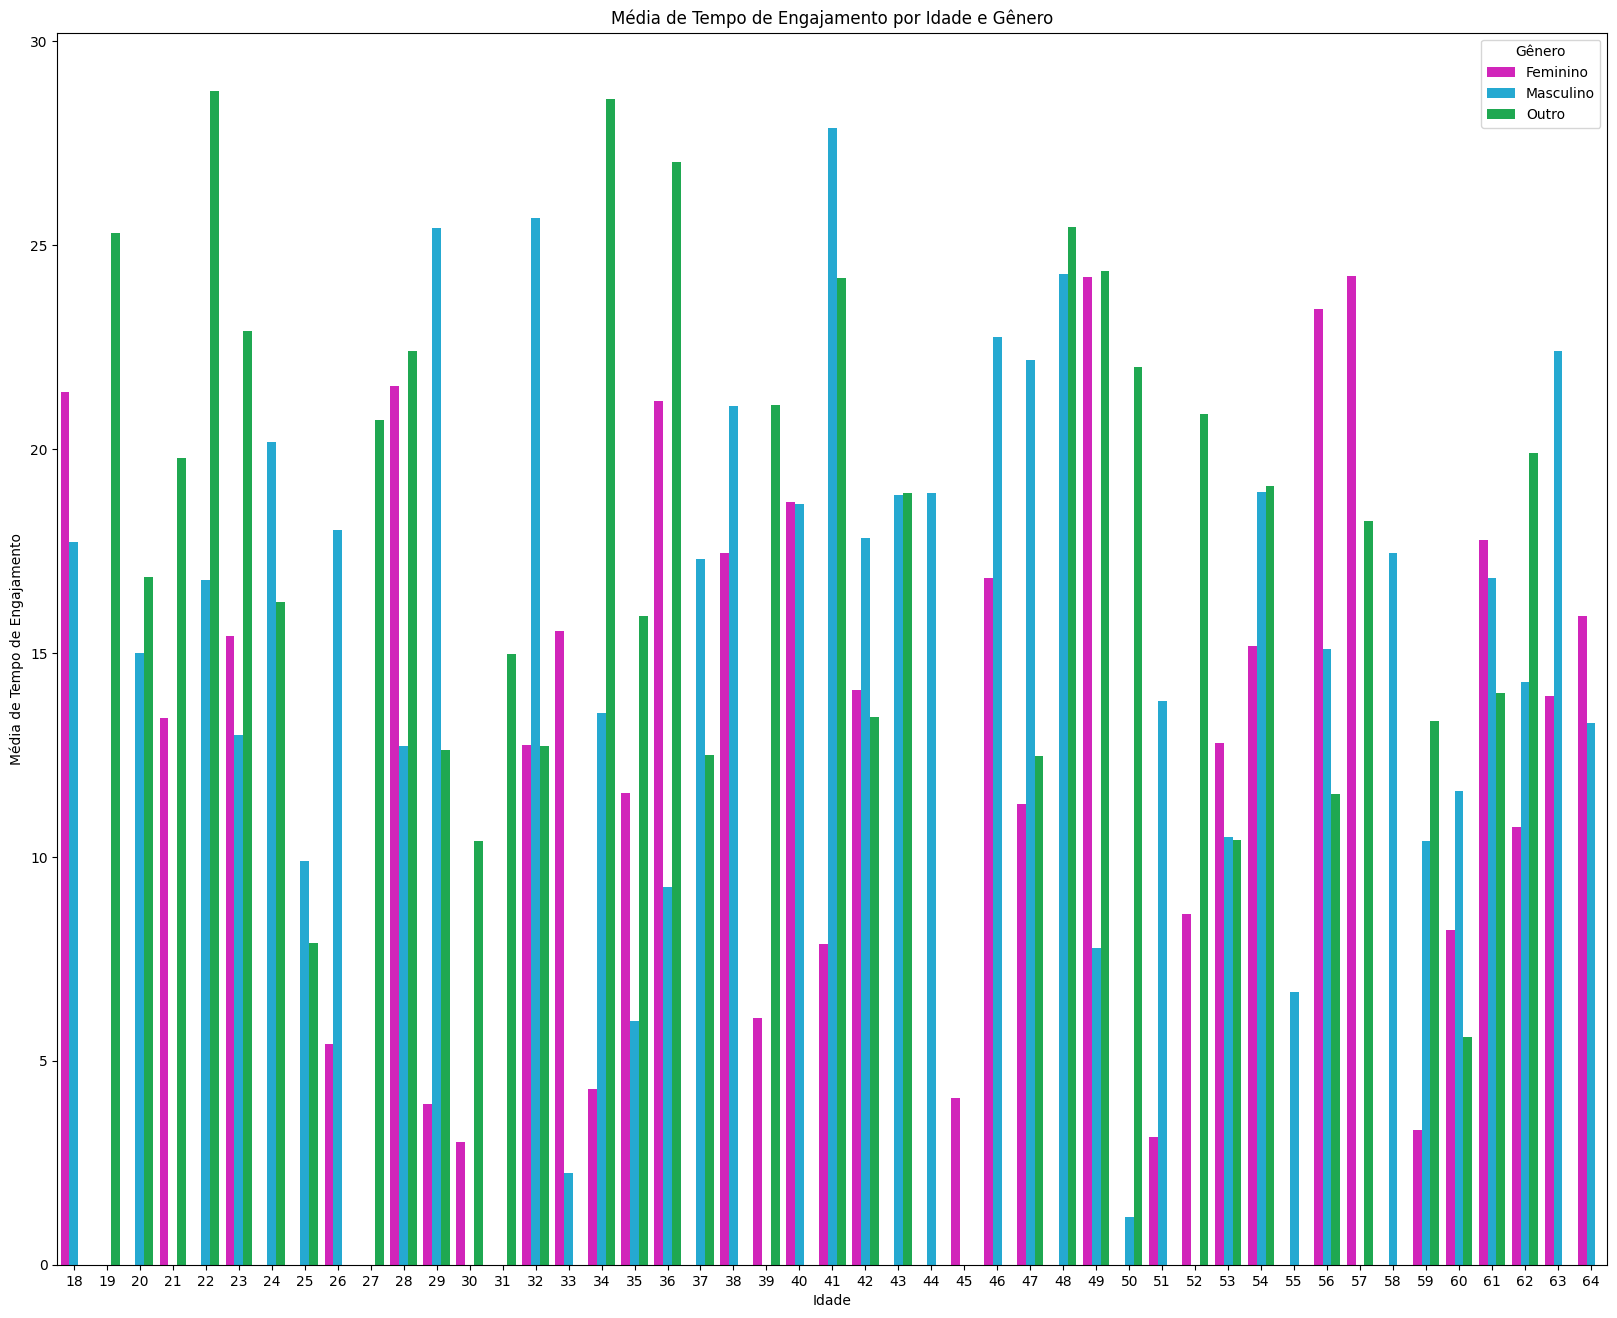

In [ ]:
media_engajamento_idade = usuarios_df.groupby(['Idade', 'Genero'])['Tempo_de_Engajamento'].mean().reset_index()

#Gráfico de barras para melhor visualização
palette = {'Masculino': '#09b8ed', 'Feminino': '#ed09cf', 'Outro': '#08bf4b'}
plt.figure(figsize=(20, 16))
sns.barplot(x='Idade', y='Tempo_de_Engajamento', hue='Genero', data=media_engajamento_idade, palette= palette)
plt.title('Média de Tempo de Engajamento por Idade e Gênero')
plt.xlabel('Idade')
plt.ylabel('Média de Tempo de Engajamento')
plt.legend(title='Gênero')
plt.show()

<ipython-input-89-9339cefcaa37>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_faixa_etaria_eng = usuarios_df.groupby(['Genero', 'Faixa_Etaria'])['Tempo_de_Engajamento'].mean().reset_index()


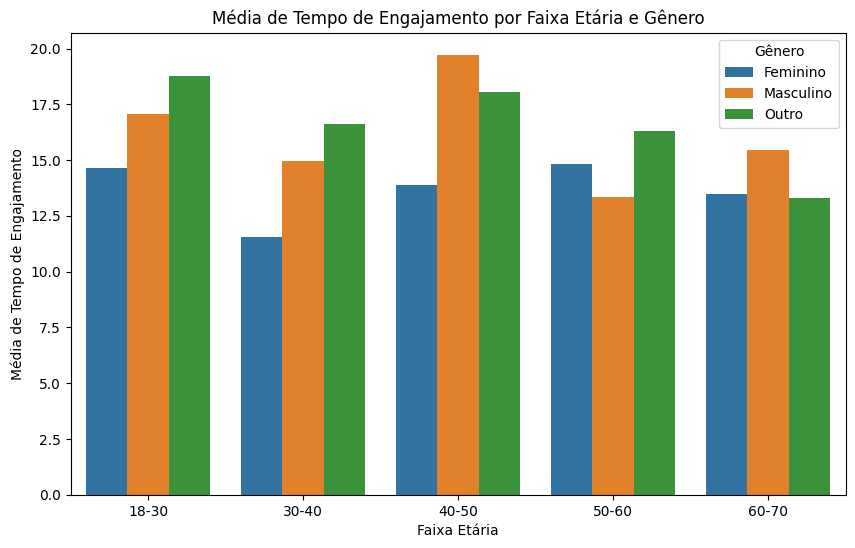

In [ ]:
#Classificar os usuários por faixa etária 18 - 30, 30-40, 50-60, 60-70, 70-80
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-30', '30-40', '40-50', '50-60', '60-70']
usuarios_df['Faixa_Etaria'] = pd.cut(usuarios_df['Idade'], bins=bins, labels=labels, right=False)
usuarios_df.head()

# Agrupar por faixa etária e calcular a média de tempo de engajamento

media_faixa_etaria_eng = usuarios_df.groupby(['Genero', 'Faixa_Etaria'])['Tempo_de_Engajamento'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Faixa_Etaria', y='Tempo_de_Engajamento', hue='Genero', data=media_faixa_etaria_eng)
plt.title('Média de Tempo de Engajamento por Faixa Etária e Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Média de Tempo de Engajamento')
plt.legend(title='Gênero')
plt.show()



In [ ]:
# Média de histórico de compras por faixa etária e gênero
media_compras = round(usuarios_df.groupby(['Genero', 'Faixa_Etaria'])['Historico_de_Compras'].mean(), 2)
print(media_compras)

Genero     Faixa_Etaria
Feminino   18-30           37.57
           30-40           55.87
           40-50           48.17
           50-60           54.44
           60-70           50.58
Masculino  18-30           42.07
           30-40           60.00
           40-50           44.13
           50-60           41.00
           60-70           44.09
Outro      18-30           39.40
           30-40           47.92
           40-50           39.13
           50-60           59.45
           60-70           55.29
Name: Historico_de_Compras, dtype: float64


<ipython-input-90-dd98dca47668>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_compras = round(usuarios_df.groupby(['Genero', 'Faixa_Etaria'])['Historico_de_Compras'].mean(), 2)


<ipython-input-267-70854b08704d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_compras = round(usuarios_df.groupby(['Genero', 'Faixa_Etaria'])['Historico_de_Compras'].mean(), 2).reset_index()


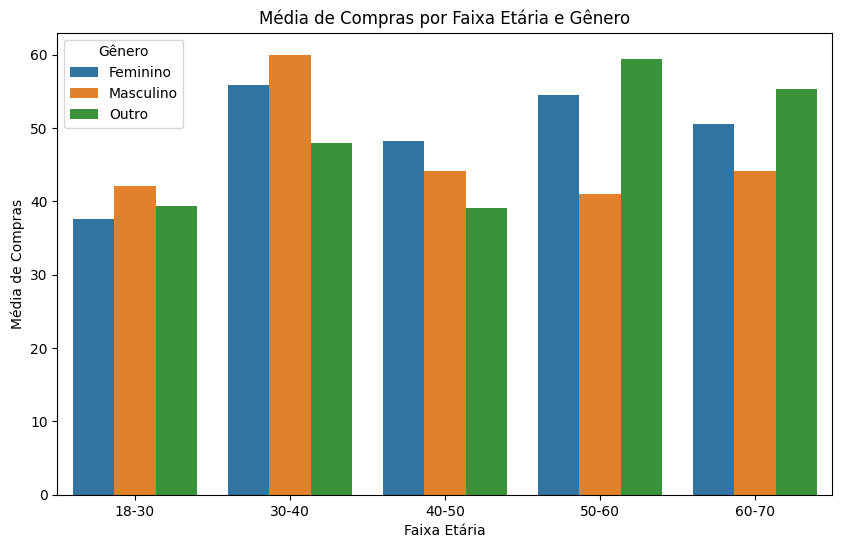

In [ ]:
media_compras = round(usuarios_df.groupby(['Genero', 'Faixa_Etaria'])['Historico_de_Compras'].mean(), 2).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Faixa_Etaria', y='Historico_de_Compras', hue='Genero', data=media_compras)
plt.title('Média de Compras por Faixa Etária e Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Média de Compras')
plt.legend(title='Gênero')
plt.show()

In [ ]:
# Correlação entre a idade dos usuários e o tempo de engajamento
correlacao_idade_engajamento = usuarios_df[['Idade', 'Tempo_de_Engajamento']].corr()
print(correlacao_idade_engajamento)
# Correlação neagtiva próxima a 0, porém é um correlação bem fraca e pode ser descartada, ou seja, não há correlação entre a idade e o tempo de engajamento dos usuários

                         Idade  Tempo_de_Engajamento
Idade                 1.000000             -0.094583
Tempo_de_Engajamento -0.094583              1.000000


In [ ]:
# Correlação entre o tempo de engajamento  e o histórico de compras
correlacao_compras_engajamento = usuarios_df[['Historico_de_Compras', 'Tempo_de_Engajamento']].corr()
print(correlacao_compras_engajamento)
#Correlação positiva próxima a 0, pode ser descartada por ser pequena, logo não há correlação entre o tempo de engajamento e o total de compras do usuário

                      Historico_de_Compras  Tempo_de_Engajamento
Historico_de_Compras              1.000000              0.008792
Tempo_de_Engajamento              0.008792              1.000000


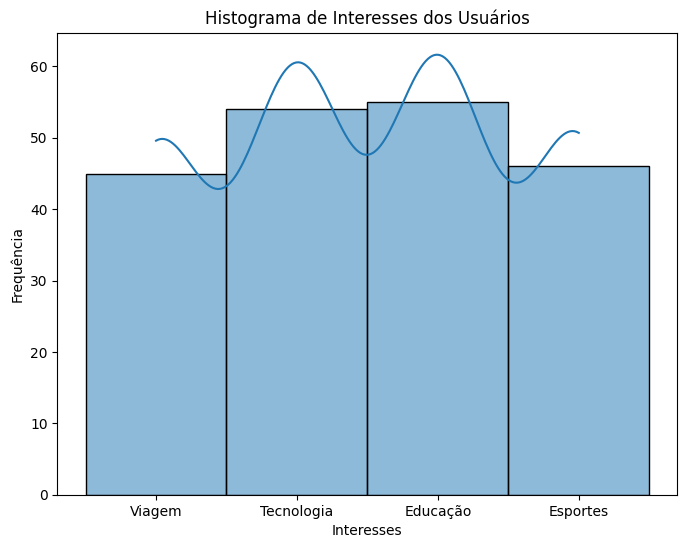

In [ ]:
# Histograma de interesses dos usuários

plt.figure(figsize=(8, 6))
sns.histplot(usuarios_df['Interesses'], bins=10, kde=True)
plt.title('Histograma de Interesses dos Usuários')
plt.xlabel('Interesses')
plt.ylabel('Frequência')
plt.show()

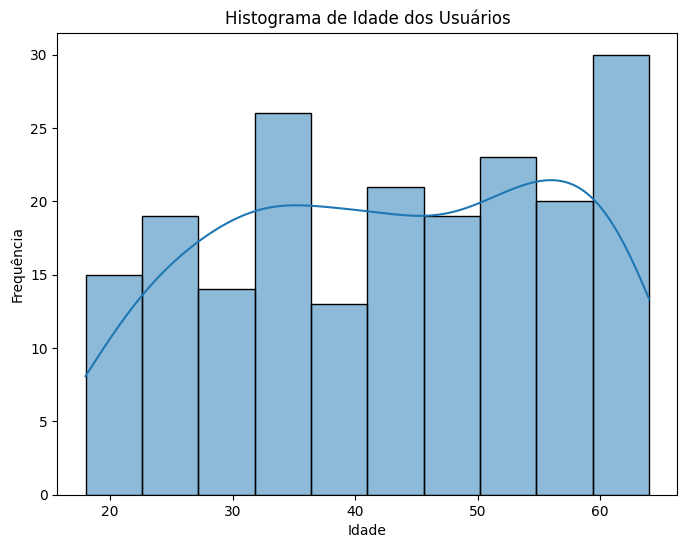

In [ ]:
# Histograma de idade dos usuários
plt.figure(figsize=(8, 6))
sns.histplot(usuarios_df['Idade'], bins=10, kde=True)
plt.title('Histograma de Idade dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

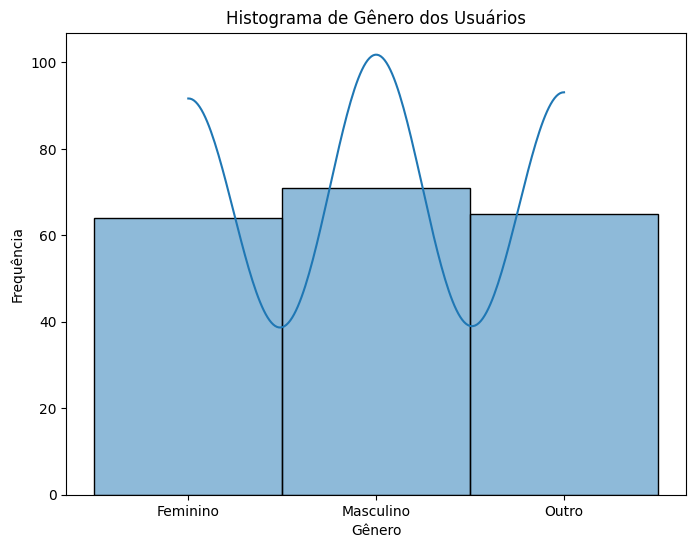

In [ ]:
# Histograma de gênero dos usuários
plt.figure(figsize=(8, 6))
sns.histplot(usuarios_df['Genero'], bins=10, kde=True)
plt.title('Histograma de Gênero dos Usuários')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

In [ ]:
#Média de investimento em campanhas por plataforma
media_investimento_plataforma = round(campanhas_df.groupby('Plataforma')['Investimento_Total'].mean().rename('Media Investimento'), 2).reset_index()
print(media_investimento_plataforma)

  Plataforma  Media Investimento
0   Facebook             5482.07
1     Google             5329.64
2  Instagram             4999.30
3   LinkedIn             6136.49


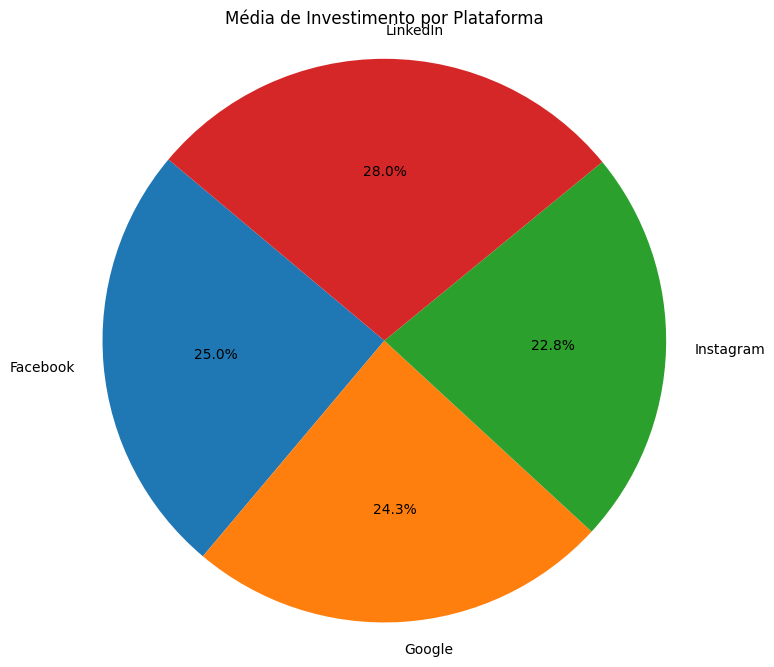

In [ ]:
media_investimento_plataforma = round(campanhas_df.groupby('Plataforma')['Investimento_Total'].mean().rename('Media Investimento'), 2).reset_index()

plt.figure(figsize=(8, 8))
plt.pie(media_investimento_plataforma['Media Investimento'], labels=media_investimento_plataforma['Plataforma'], autopct='%.1f%%', startangle=140)

plt.title('Média de Investimento por Plataforma')
plt.axis('equal')
plt.show()

In [ ]:
# Média de investimento total por segmento alvo e plataforma
media_investimento_segmento = round(campanhas_df.groupby(['Plataforma', 'Segmento_Alvo'])['Investimento_Total'].mean().rename('Media Investimento'), 2).reset_index()
print(media_investimento_segmento)

   Plataforma Segmento_Alvo  Media Investimento
0    Facebook      Educação             5877.60
1    Facebook    Financeiro             5056.35
2    Facebook         Saúde             5090.93
3    Facebook    Tecnologia             4837.14
4      Google      Educação             6042.84
5      Google    Financeiro             4730.66
6      Google         Saúde             4437.19
7      Google    Tecnologia             5550.32
8   Instagram      Educação             4921.81
9   Instagram    Financeiro             5815.97
10  Instagram         Saúde             4988.37
11  Instagram    Tecnologia             3706.26
12   LinkedIn      Educação             7767.98
13   LinkedIn    Financeiro             2640.55
14   LinkedIn         Saúde             5656.38
15   LinkedIn    Tecnologia             5906.41


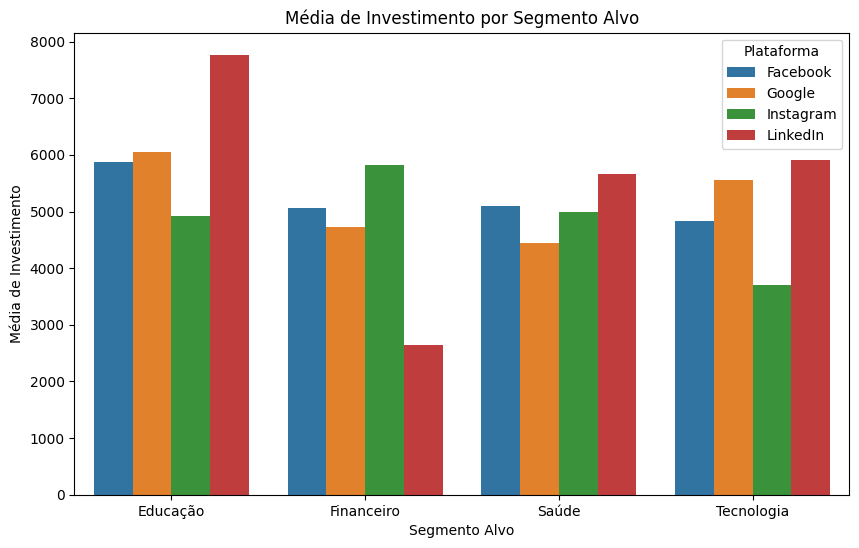

In [ ]:
media_investimento_segmento = round(campanhas_df.groupby(['Plataforma', 'Segmento_Alvo'])['Investimento_Total'].mean().rename('Media Investimento'), 2).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Segmento_Alvo', y='Media Investimento', hue='Plataforma', data=media_investimento_segmento)
plt.title('Média de Investimento por Segmento Alvo')
plt.xlabel('Segmento Alvo')
plt.ylabel('Média de Investimento')
plt.legend(title='Plataforma')
plt.show()

In [ ]:
#Média de cliques por plataforma - tabela campanhas
media_clique = round(campanhas_df.groupby('Plataforma')['Cliques'].mean().rename('Media Cliques'), 2)
print(media_clique)

Plataforma
Facebook     5162.15
Google       4845.96
Instagram    4105.21
LinkedIn     5012.52
Name: Media Cliques, dtype: float64


In [ ]:
# Correlação entre cliques e conversões - tabela campanhas
correlacao_cliques_conversao = campanhas_df[['Cliques', 'Conversoes']].corr()
print(correlacao_cliques_conversao) #Correlação positiva próxima a 0, aumento de cliques pode afetar positivamente as conversões

            Cliques  Conversoes
Cliques      1.0000      0.1035
Conversoes   0.1035      1.0000


In [ ]:
# Correlação entre impressões e conversões
correlacao_impressoes_conversao = campanhas_df[['Impressoes', 'Conversoes']].corr()
print(correlacao_impressoes_conversao)

            Impressoes  Conversoes
Impressoes    1.000000   -0.112835
Conversoes   -0.112835    1.000000


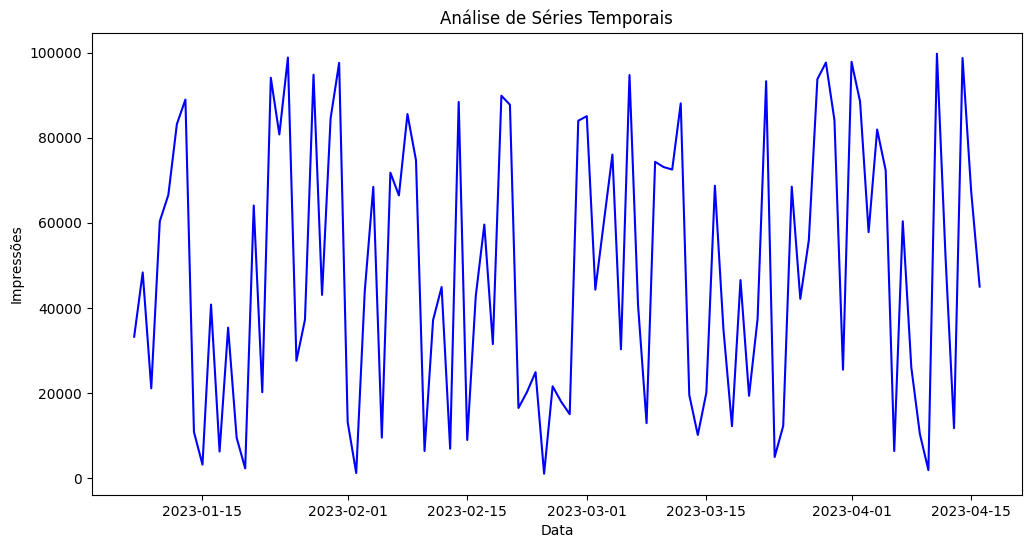

In [ ]:
# Análise temporal de impressões
serie_temporal = campanhas_df
serie_temporal.set_index('Data_Fim', inplace=True)

# Gráfico da série temporal
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal.index, serie_temporal['Impressoes'], color='blue')
plt.title('Análise de Séries Temporais')
plt.xlabel('Data')
plt.ylabel('Impressões')
plt.show()

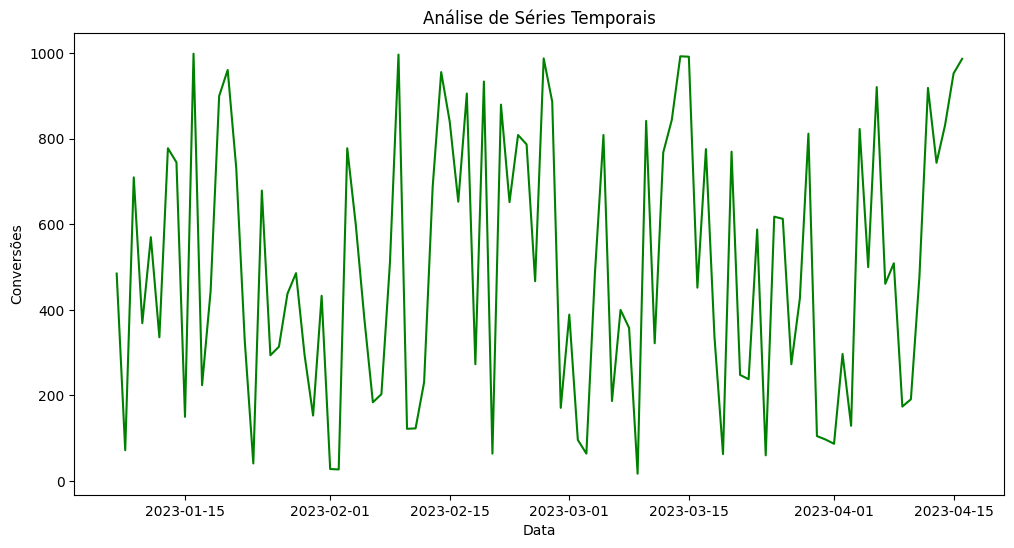

In [ ]:
# Análise temporal de Conversões
serie_temporal = campanhas_df
serie_temporal.set_index('Data_Fim', inplace=True)

# Gráfico da série temporal
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal.index, serie_temporal['Conversoes'], color='green')
plt.title('Análise de Séries Temporais')
plt.xlabel('Data')
plt.ylabel('Conversões')
plt.show()

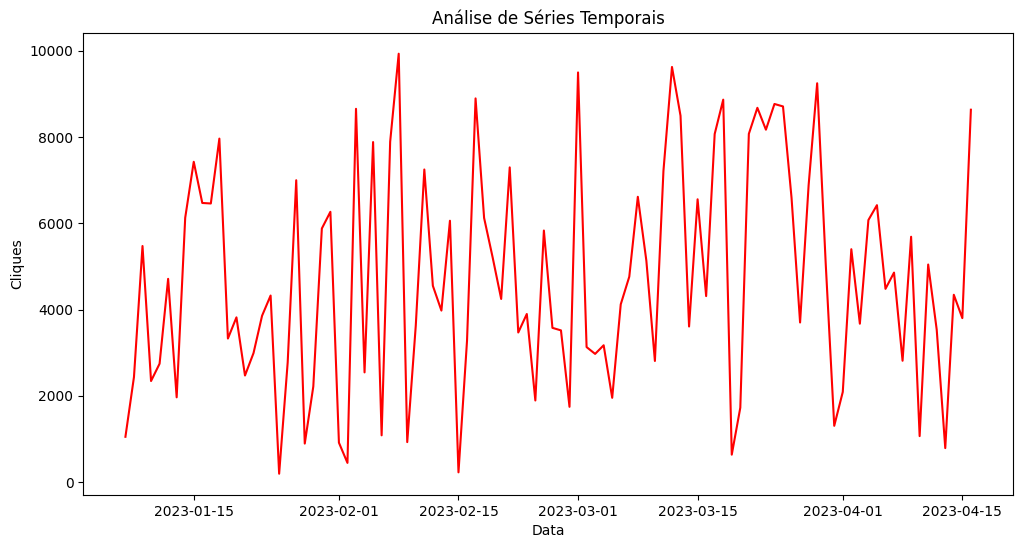

In [ ]:
# Análise temporal de Cliques
serie_temporal = campanhas_df
serie_temporal.set_index('Data_Fim', inplace=True)

# Gráfico da série temporal
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal.index, serie_temporal['Cliques'], color='red')
plt.title('Análise de Séries Temporais')
plt.xlabel('Data')
plt.ylabel('Cliques')
plt.show()

In [ ]:
#Teste t para avaliar se a média de cliques é superior a 4000

valor_hipotetico = 4000  # Valor hipotético para a média das vendas
t_stat, p_valor = stats.ttest_1samp(campanhas_df['Cliques'], valor_hipotetico)

# Resultados do teste
print(f"Estatística t: {t_stat}, p-valor: {p_valor}")

# Interpretação do p-valor
if p_valor < 0.05:
    print("Rejeitamos a hipótese nula (H0), a média de cliques é significativamente diferente de 4000.")
else:
    print("Não podemos rejeitar a hipótese nula (H0), a média de cliques não é significativamente diferente de 4000.")


Estatística t: 2.8284794318071786, p-valor: 0.005661652336494792
Rejeitamos a hipótese nula (H0), a média de cliques é significativamente diferente de 4000.


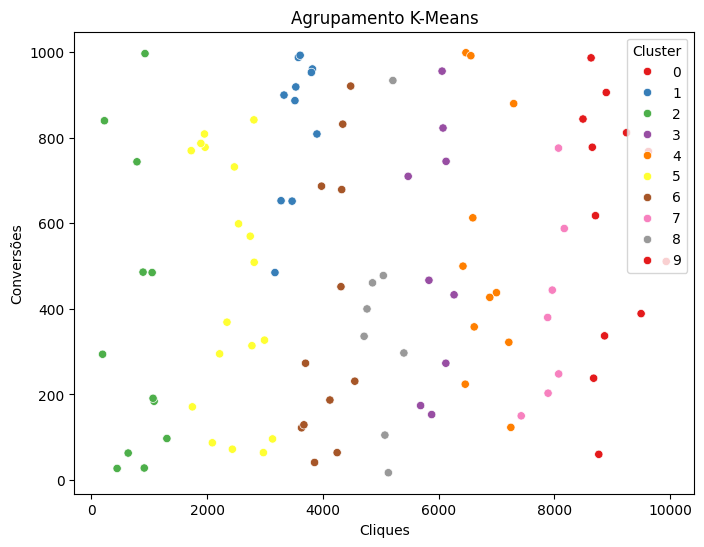

In [ ]:
# K-Means para Agrupamento entre cliques e conversões
from sklearn.cluster import KMeans

X = campanhas_df[['Cliques', 'Conversoes']]

kmeans = KMeans(n_clusters=10, random_state=1)
campanhas_df['Cluster'] = kmeans.fit_predict(X)

# Gráfico de dispersão com agrupamento
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cliques', y='Conversoes', hue='Cluster', data=campanhas_df, palette='Set1')
plt.title('Agrupamento K-Means')
plt.xlabel('Cliques')
plt.ylabel('Conversões')
plt.legend(title='Cluster')
plt.show()

**Base de dados recursos_humanos**

In [ ]:
import mysql.connector
from mysql.connector import Error

#Definir as credenciais e informações da conexão
servidor = '35.193.47.202'
basededados = 'recursos_humanos'
usuario = 'Patrícia'
senha = ''

In [ ]:
def connect_to_database():
  try:
    connection = mysql.connector.connect(
        host = servidor,
        database = basededados,
        user = usuario,
        password = senha
    )
    if connection.is_connected():
      print("Conexão bem-sucedidade ao banco de dados MySQL!")
      return connection
  except Error as e:
    print("Erro ao conectar ao MySQL", e)
    return None

In [ ]:
#Chamar a função de conexão
connection = connect_to_database()

Conexão bem-sucedidade ao banco de dados MySQL!


In [ ]:
#Fechar a conexão
if connection:
  connection.close()

**Tabela Avaliações**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    avaliacoes_df = pd.DataFrame(data, columns=columns)
    return avaliacoes_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM Avaliacoes;"
  avaliacoes_df = fecth_data_as_dataframe(connection, query)

  if avaliacoes_df is not None:
    print("Dados da Tabela avaliacoes:")
    print(avaliacoes_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela avaliacoes:
   ID_Avaliacao  ID_Funcionario Data_Avaliacao  Pontuacao  \
0             1              24     2022-01-31    2.16235   
1             2              30     2022-02-28    4.14788   
2             3              86     2022-03-31    1.44774   
3             4              92     2022-04-30    2.42389   
4             5               7     2022-05-31    4.91225   

                                          Comentario  
0                 Walk PM address worker experience.  
1  Six learn executive term during team investmen...  
2               Check whole building just there cup.  
3            Industry morning career impact various.  
4           Positive give drug read it site mission.  


In [ ]:
avaliacoes_df.shape #(100,5)
avaliacoes_df.isnull().any() #nenhum valor nulo
avaliacoes_df.duplicated() #nenhum valor duplicado
avaliacoes_df.dtypes

,0
ID_Avaliacao,int64
ID_Funcionario,int64
Data_Avaliacao,datetime64[ns]
Pontuacao,float64
Comentario,object


**Tabela Desligamentos**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    desligamentos_df = pd.DataFrame(data, columns=columns)
    return desligamentos_df

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM Desligamentos;"
  desligamentos_df = fecth_data_as_dataframe(connection, query)

  if desligamentos_df is not None:
    print("Dados da Tabela desligamentos:")
    print(desligamentos_df.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela desligamentos:
   ID_Desligamento  ID_Funcionario Data_Desligamento              Motivo
0                1              24        2023-01-01  Pedido de Demissão
1                2              34        2023-01-08  Pedido de Demissão
2                3              30        2023-01-15  Pedido de Demissão
3                4              82        2023-01-22     Corte de Custos
4                5              19        2023-01-29     Corte de Custos


In [ ]:
desligamentos_df.shape #(50,4)
desligamentos_df.isnull().any() #nenhum valor nulo
desligamentos_df.duplicated() #nenhum valor duplicado
desligamentos_df.dtypes

,0
ID_Desligamento,int64
ID_Funcionario,int64
Data_Desligamento,datetime64[ns]
Motivo,object


**Tabela Funcionários**

In [ ]:
import pandas as pd

def fecth_data_as_dataframe(connection, query):
  try:
    cursor =connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    df_funcionario = pd.DataFrame(data, columns=columns)
    return df_funcionario

  except Error as e:
    print("Erro ao consultar dados", e)
    return None
  finally:
    cursor.close()

#Chamar a conexao com o banco de dados
connection = connect_to_database() #Este trecho tenta se conectar ao banco de dados.


if connection:
  query = "SELECT * FROM Funcionarios;"
  df_funcionario = fecth_data_as_dataframe(connection, query)

  if funcionarios_df is not None:
    print("Dados da Tabela funcionarios:")
    print(df_funcionario.head())

Conexão bem-sucedidade ao banco de dados MySQL!
Dados da Tabela funcionarios:
   ID_Funcionario             Nome  Idade Departamento        Cargo   Salario  \
0               1        Jacob Lee     39           RH      Diretor  11725.00   
1               2     Regina Young     27           TI      Diretor  12553.00   
2               3  Steven Townsend     56           RH      Gerente  10534.20   
3               4    David Miranda     43       Vendas  Coordenador   3665.24   
4               5      Rebecca Cox     36   Financeiro      Diretor   6397.48   

  Data_Contratacao  
0       2015-01-31  
1       2015-02-28  
2       2015-03-31  
3       2015-04-30  
4       2015-05-31  


In [ ]:
df_funcionario.shape #(100,7)
df_funcionario.isnull().any() #nenhum valor nulo
df_funcionario.duplicated() #nenhum valor duplicado
df_funcionario.dtypes

,0
ID_Funcionario,int64
Nome,object
Idade,int64
Departamento,object
Cargo,object
Salario,float64
Data_Contratacao,datetime64[ns]


**Estatística**

In [ ]:
#Média de Idade dos funcionários por departamento
media_idade_departamento = round(df_funcionario.groupby('Departamento')['Idade'].mean().rename('Media Idade'), 2).reset_index()
print(media_idade_departamento)

  Departamento  Media Idade
0   Financeiro        42.09
1           RH        40.00
2           TI        37.73
3       Vendas        41.82


In [ ]:
# Média de salário por cargo e faixa etária
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '30-40', '40-50', '50-60']
df_funcionario['Faixa_Etaria'] = pd.cut(df_funcionario['Idade'], bins=bins, labels=labels, right=False)
df_funcionario.head()

media_salario_cargo = round(df_funcionario.groupby(['Cargo', 'Faixa_Etaria'])['Salario'].mean().rename('Media Salario'), 2).reset_index()
print(media_salario_cargo)

          Cargo Faixa_Etaria  Media Salario
0      Analista        18-30        8977.38
1      Analista        30-40        7808.56
2      Analista        40-50        6734.66
3      Analista        50-60        9607.44
4   Coordenador        18-30        8008.44
5   Coordenador        30-40       11284.60
6   Coordenador        40-50        7462.04
7   Coordenador        50-60        9024.27
8       Diretor        18-30       10265.56
9       Diretor        30-40        9038.66
10      Diretor        40-50       10885.23
11      Diretor        50-60       10667.70
12      Gerente        18-30        7380.76
13      Gerente        30-40       10681.53
14      Gerente        40-50        7823.67
15      Gerente        50-60        5917.73


<ipython-input-129-42fffedc2020>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_salario_cargo = round(df_funcionario.groupby(['Cargo', 'Faixa_Etaria'])['Salario'].mean().rename('Media Salario'), 2).reset_index()


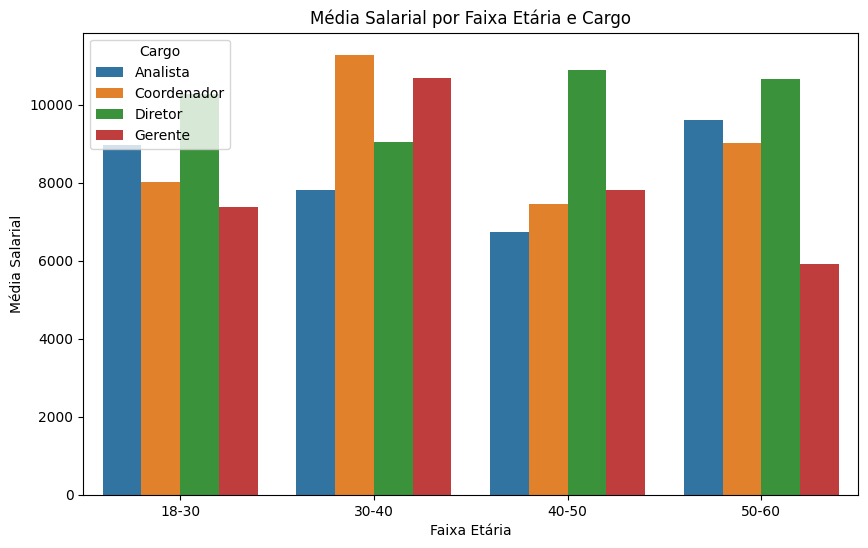

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Faixa_Etaria', y='Media Salario', hue='Cargo', data=media_salario_cargo)
plt.title('Média Salarial por Faixa Etária e Cargo')
plt.xlabel('Faixa Etária')
plt.ylabel('Média Salarial')
plt.legend(title='Cargo')
plt.show()

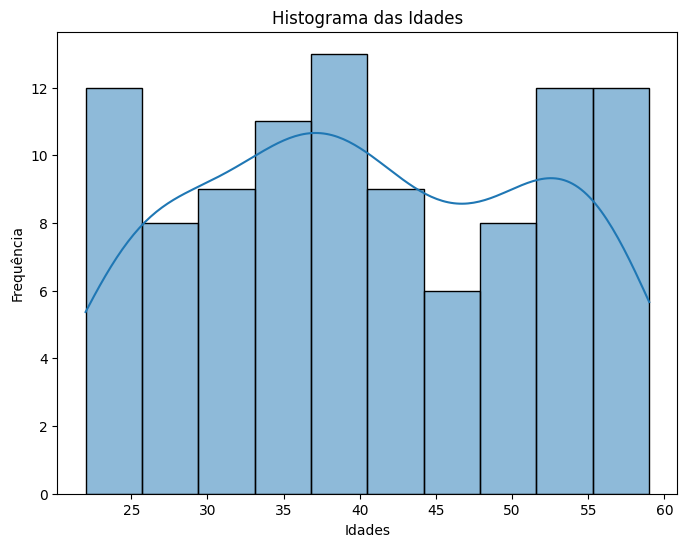

In [ ]:
# Histograma de Idade dos funcionários

plt.figure(figsize=(8, 6))
sns.histplot(df_funcionario['Idade'], bins=10, kde=True)
plt.title('Histograma das Idades')
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.show()

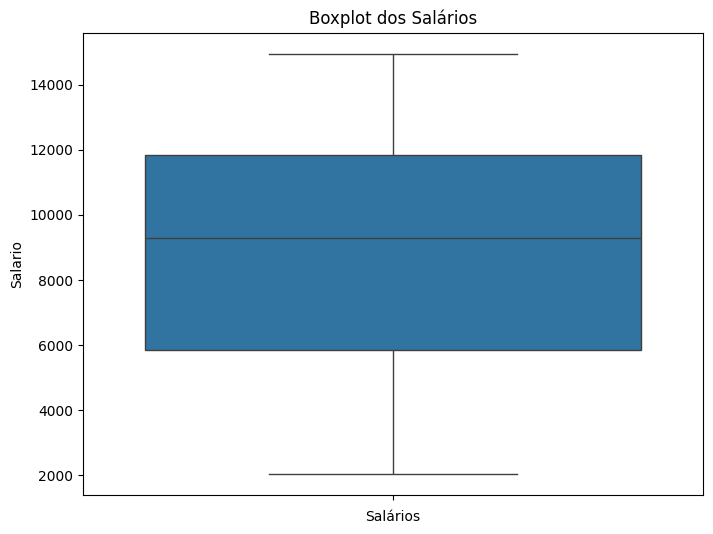

In [ ]:
# Boxplot para analisar os salários

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para análise de outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df_funcionario['Salario'])
plt.title('Boxplot dos Salários')
plt.xlabel('Salários')
plt.show()

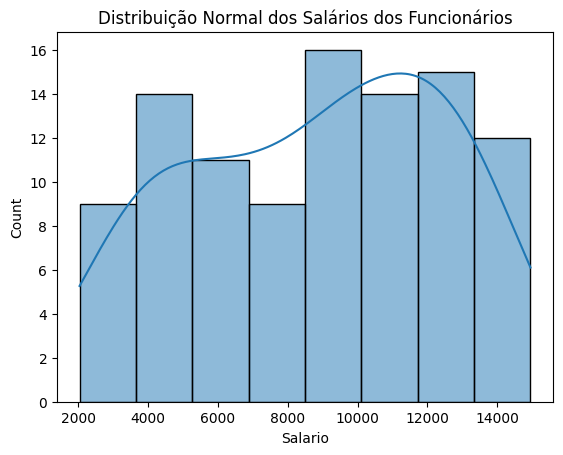

In [ ]:
# Distribuição normal dos salários
sns.histplot(df_funcionario['Salario'], kde=True)
plt.title('Distribuição Normal dos Salários dos Funcionários')
plt.show()

In [ ]:
#Correlação entre idade e salário
correlacao_idade_salario = df_funcionario[['Salario', 'Idade']].corr()
print(correlacao_idade_salario) # Correlação negativa muito próxima a 0, porém pode ser descartada por ser muito pequena

          Salario     Idade
Salario  1.000000 -0.034929
Idade   -0.034929  1.000000


In [ ]:
# Correlação entre avaliações e salário - combinar dfs
df_comb_avaliacoes_func = pd.merge(avaliacoes_df, df_funcionario, on='ID_Funcionario')
df_comb_avaliacoes_func.head()

correlacao_avaliacoes_salario = df_comb_avaliacoes_func[['Pontuacao', 'Salario']].corr()
print(correlacao_avaliacoes_salario) # Correlação negativa muito próxima a 0, pode ser descartada

           Pontuacao   Salario
Pontuacao   1.000000 -0.050418
Salario    -0.050418  1.000000


In [ ]:
# Média de pontuações nas avaliações de funcionários por departamento e cargo
media_avaliacoes_departamento = round(df_comb_avaliacoes_func.groupby(['Departamento', 'Cargo'])['Pontuacao'].mean().rename('Media Pontuacao'), 2).reset_index()
print(media_avaliacoes_departamento)

   Departamento        Cargo  Media Pontuacao
0    Financeiro     Analista             2.21
1    Financeiro  Coordenador             2.68
2    Financeiro      Diretor             3.92
3    Financeiro      Gerente             3.55
4            RH     Analista             3.02
5            RH  Coordenador             3.38
6            RH      Diretor             2.49
7            RH      Gerente             3.19
8            TI     Analista             3.54
9            TI  Coordenador             3.20
10           TI      Diretor             3.16
11           TI      Gerente             2.74
12       Vendas     Analista             2.88
13       Vendas  Coordenador             3.56
14       Vendas      Diretor             2.47
15       Vendas      Gerente             3.51


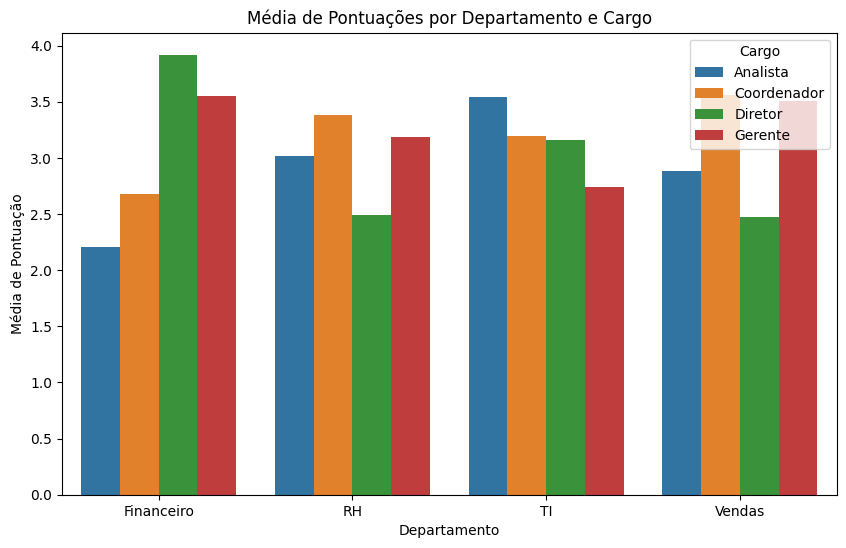

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Departamento', y='Media Pontuacao', hue='Cargo', data=media_avaliacoes_departamento)
plt.title('Média de Pontuações por Departamento e Cargo')
plt.xlabel('Departamento')
plt.ylabel('Média de Pontuação')
plt.legend(title='Cargo')
plt.show()

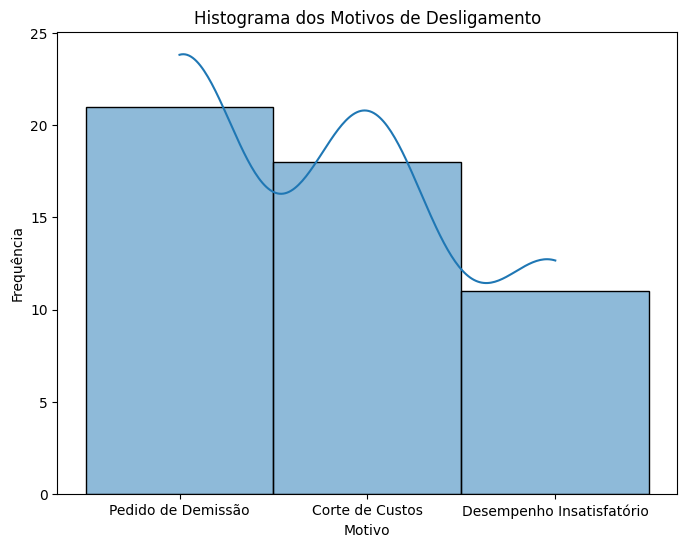

In [ ]:
# Histograma de motivo de desligamento
plt.figure(figsize=(8, 6))
sns.histplot(desligamentos_df['Motivo'], bins=10, kde=True)
plt.title('Histograma dos Motivos de Desligamento')
plt.xlabel('Motivo')
plt.ylabel('Frequência')
plt.show()


In [ ]:
# Covariância entre idade e salário
covariancia = df_funcionario[['Idade', 'Salario']].cov()
print("Covariância entre Idade e Salario:")
print(covariancia) # A covariância negativa entre idade e salário, indica que o aumento da idade do funcionário acarreta na redução do seu salário

Covariância entre Idade e Salario:
               Idade       Salario
Idade     122.595859 -1.410487e+03
Salario -1410.487449  1.330120e+07


In [ ]:
# Teste t para verificar se a média de salário é igual a 8000
import pandas as pd
import numpy as np
from scipy import stats

valor_hipotetico = 8000
t_stat, p_valor = stats.ttest_1samp(df_funcionario['Salario'], valor_hipotetico)

# Resultados do teste
print(f"Estatística t: {t_stat}, p-valor: {p_valor}")

# Interpretação do p-valor
if p_valor < 0.05:
    print("Rejeitamos a hipótese nula (H0), a média dos salários é significativamente diferente de R$ 8000.")
else:
    print("Não podemos rejeitar a hipótese nula (H0), a média dos salários não é significativamente diferente de R$ 8000.")

Estatística t: 2.329595617758146, p-valor: 0.021858793109111315
Rejeitamos a hipótese nula (H0), a média dos salários é significativamente diferente de R$ 8000.
